In [96]:
import thinkbayes2
import numpy
import matplotlib as mpl

In [178]:
class Train(thinkbayes2.Suite):
    def __init__(self,hypos):
        #maxNumTrains=range(1,1001)
        #alpha=numpy.arange(0.01,1.0,0.1)
        #cross=[(x,y) for x in maxNumTrains for y in alpha]
        thinkbayes2.Suite.__init__(self)
        for hypo in hypos:
            self.Set(hypo,float(hypo[0])/(hypo[0]**hypo[1]))
        self.Normalize()
        
    def nthCompanyHasTrains(self,c,hypo):
        """returns how many trains company c has. Hypo is a numtrains,alpha pair"""
        """power law"""
        return int(float(hypo[0])/(c**hypo[1]))
        """geometric distribution"""
        #return int(((1.0-hypo[1])**c)*hypo[1])
        
    def Likelihood(self,data,hypo):
        """hypotheses: a numtrains,alpha pair. Data: the train number seen"""
        like=0.0
        c=1
        bot=0.0
        while (self.nthCompanyHasTrains(c,hypo)>=data):
            bot+=float(self.nthCompanyHasTrains(c,hypo))
            c+=1
        c-=1 #due to c starting at 1, and the fact that we increment it after the loop is evaluated    
        if c==0:
            return 0
        return float(c)/bot
    


In [187]:
TRAINRANGE=range(1,1001)
ALPHARANGE=numpy.arange(1,2.0,0.01)
t=Train([(x,y) for x in TRAINRANGE for y in ALPHARANGE])

In [188]:
t.Update(3)
t.Update(5)
t.Update(2)

0.11444015832495694

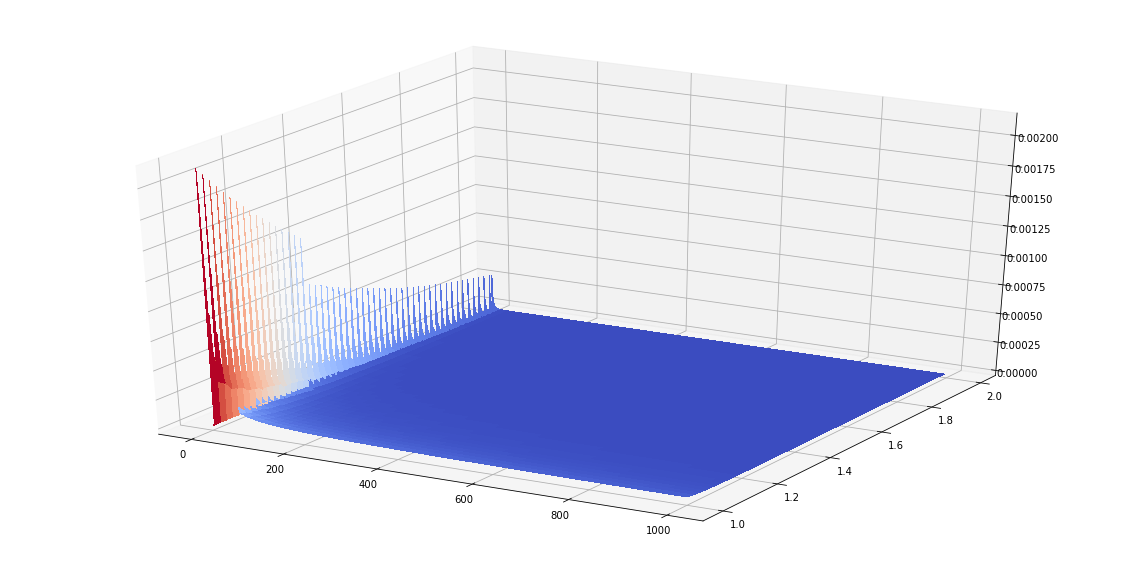

In [189]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def computeMesh(a1,a2):
    out=[]
    c=0
    for y in range(0,len(a1)):
        out.append([])
        for x in range(0,len(a1[0])):
            out[y].append(t[(a1[y][x],a2[y][x])])
        c+=1
    return out

def doPlot():
    fig=plt.figure(figsize=(20,10))
    ax=fig.gca(projection='3d')
    X,Y=numpy.meshgrid(TRAINRANGE,ALPHARANGE)
    Z=computeMesh(X,Y)
    surf=ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
    plt.show()

doPlot()

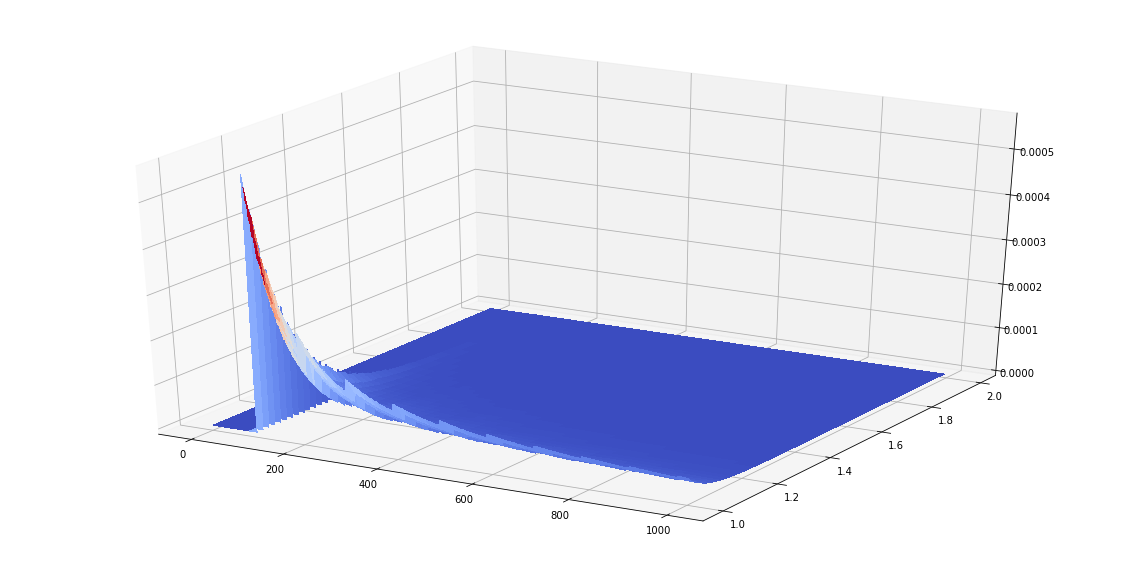

In [190]:
t.Update(98)

doPlot()

In [193]:
interval = t.Percentile(5), t.Percentile(95)
print(interval)

((105, 1.0), (871, 1.03))
